In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import csv

In [3]:
cadence=26
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*cadence) for i in t_list_years]
run=50
cluster_size=2000
steps=7800

# 50 stars

## make an array of just the observational times

In [4]:
burst50=np.load('/home/lee/data/cluster_size_change/6x_burst/burst50_6x.npy')
L50=np.load('/home/lee/data/cluster_size_change/6x_burst/L50_6x.npy')
C50=np.load('/home/lee/data/cluster_size_change/6x_burst/C50_6x.npy')

In [5]:
cluster_size50=50
cad_L50=np.zeros((run,cluster_size50,12))
for i in range(run):
    for j in range(cluster_size50):
        for k in range(len(t_list_cadence)):
            cad_L50[i,j,k]=L50[i,j,t_list_cadence[k]]

## Figure out if a star is undergoing a burst and replace the last 30 years

In [8]:
obs_burst50=np.zeros((run,cluster_size50,12))
for i in range(run):
    for k in range(cluster_size50):
        for j in range(1,12):
            if j==1:
                if cad_L50[i,k,j]-cad_L50[i,k,j-1]==2:
                    obs_burst50[i,k,j-1]=1
                elif cad_L50[i,k,j-1]-cad_L50[i,k,j]==2:
                    if cad_L50[i,k,j]!=cad_L50[i,k,j+1]:
                        obs_burst50[i,k,j]=1
                    elif cad_L50[i,k,j]==cad_L50[i,k,j+1]:
                        obs_burst50[i,k,j:j+2]=1
            else:
                if cad_L50[i,k,j]-cad_L50[i,k,j-1]==2:
                    obs_burst50[i,k,j-6:j]=1 
                    obs_burst50[i,k,0]=0
                elif cad_L50[i,k,j-1]-cad_L50[i,k,j]==2:
                    obs_burst50[i,k,j:j+6]=1
                    print(i,k)

0 1
0 2
0 7
0 8
0 13
0 15
0 23
0 25
0 38
1 1
1 3
1 17
1 19
1 31
1 46
2 1
2 4
2 5
2 8
2 10
2 11
2 13
2 16
2 31
2 35
2 36
2 47
3 3
3 4
3 11
3 12
3 17
3 19
3 24
3 28
3 29
3 32
3 36
3 45
4 3
4 21
4 28
4 29
4 31
4 43
4 45
4 49
5 1
5 32
5 45
6 11
6 12
6 14
6 16
6 35
6 38
6 46
7 6
7 16
7 21
7 30
7 34
7 37
7 40
7 45
8 2
8 8
8 9
8 11
8 22
8 28
8 30
8 37
8 38
8 42
9 2
9 3
9 15
9 18
9 23
9 32
9 36
9 38
9 40
9 40
9 44
9 46
9 46
9 47
9 48
9 49
10 0
10 1
10 6
10 9
10 18
10 20
10 30
10 31
10 36
10 40
10 41
10 44
10 49
11 4
11 7
11 8
11 13
11 16
11 17
11 26
11 39
12 0
12 5
12 7
12 11
12 16
12 22
12 27
13 6
13 9
13 11
13 19
13 26
13 33
13 36
13 44
14 1
14 9
14 13
14 19
14 22
14 23
14 28
14 31
14 35
14 35
14 43
15 7
15 10
15 11
15 12
15 13
15 14
15 17
15 22
15 24
15 25
15 27
15 30
15 33
15 37
16 6
16 7
16 10
16 15
16 17
16 22
16 23
16 29
16 36
16 42
16 46
17 1
17 2
17 3
17 9
17 10
17 23
17 28
17 29
17 30
17 35
17 37
17 44
17 45
17 48
18 9
18 10
18 12
18 14
18 15
18 18
18 19
18 22
18 27
18 32
18 35
18 36

In [62]:
print(obs_burst50[0,1,:])

[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]


In [63]:
print(cad_L50[0,1,:])

[2.22100369 2.22100369 2.22100369 2.22100369 2.22100369 0.22100369
 0.22100369 0.22100369 0.22100369 0.22100369 0.22100369 2.22100369]


## count the number of zeros and ones

In [10]:
num6_50=0
list6_50=[]
num0_50=0
list0_50=[]

for i in range(run):
    for k in range(cluster_size50):
        for j in range(0,12):
            if obs_burst50[i,k,j]==1:
                num6_50+=1
            elif obs_burst50[i,k,j]==0:
                num0_50+=1
    list6_50.append(num6_50)
    num6_50=0
    list0_50.append(num0_50)
    num0_50=0

## convert it to mass

In [11]:
mass6_50=[]
mass0_50=[]
for i in range(run):
    mass6_50.append(list6_50[i]*6)
    mass0_50.append(list0_50[i]*1)

## find fraction

In [12]:
frac6_50=[]
frac0_50=[]
for i in range(run):
    total50=mass6_50[i]+mass0_50[i]
    frac6_50.append(100*mass6_50[i]/total50)
    frac0_50.append(100*mass0_50[i]/total50)

## plot it

/tmp/ipykernel_86559/2485460613.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


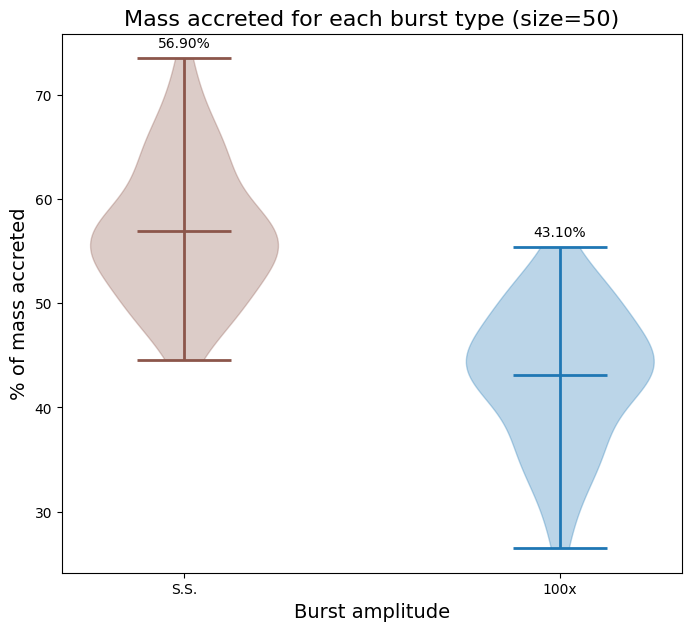

In [13]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac6_50,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_50,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_50))
string6='{:.2f}%'.format(np.mean(frac6_50))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_50)+1,string0,ha='center')
ax1.text(2,np.max(frac6_50)+1,string6,ha='center')
plt.title('Mass accreted for each burst type (size=50)',fontsize=16)
plt.show()    

# 100 stars

## make an array of just observational times

In [14]:
burst100=np.load('/home/lee/data/cluster_size_change/6x_burst/burst100_6x.npy')
L100=np.load('/home/lee/data/cluster_size_change/6x_burst/L100_6x.npy')
C100=np.load('/home/lee/data/cluster_size_change/6x_burst/C100_6x.npy')

In [15]:
cluster_size100=100
cad_L100=np.zeros((run,cluster_size100,12))
for i in range(run):
    for j in range(cluster_size100):
        for k in range(len(t_list_cadence)):
            cad_L100[i,j,k]=L100[i,j,t_list_cadence[k]]

## Figure out if a star is undergoing a burst and replace the last 30 years

In [17]:
obs_burst100=np.zeros((run,cluster_size100,12))
for i in range(run):
    for k in range(cluster_size100):
        for j in range(1,12):
            if j==1:
                if cad_L100[i,k,j]-cad_L100[i,k,j-1]==2:
                    obs_burst100[i,k,j-1]=1
                elif cad_L100[i,k,j-1]-cad_L100[i,k,j]==2:
                    if cad_L100[i,k,j]!=cad_L100[i,k,j+1]:
                        obs_burst100[i,k,j]=1
                    elif cad_L100[i,k,j]==cad_L100[i,k,j+1]:
                        obs_burst100[i,k,j:j+2]=1
            else:
                if cad_L100[i,k,j]-cad_L100[i,k,j-1]==2:
                    obs_burst100[i,k,j-6:j]=1 
                    obs_burst100[i,k,0]=0
                elif cad_L100[i,k,j-1]-cad_L100[i,k,j]==2:
                    obs_burst100[i,k,j:j+6]=1
                    print(i,k)

0 6
0 20
0 24
0 29
0 31
0 34
0 40
0 47
0 48
0 61
0 77
0 78
0 84
0 88
0 91
0 92
0 96
0 98
1 4
1 5
1 6
1 17
1 37
1 38
1 43
1 44
1 49
1 58
1 60
1 63
1 65
1 66
1 68
1 69
1 70
1 73
1 76
1 78
1 82
1 88
2 1
2 2
2 2
2 9
2 12
2 19
2 23
2 30
2 31
2 31
2 32
2 32
2 43
2 44
2 51
2 52
2 56
2 66
2 85
2 90
2 92
2 93
2 99
3 1
3 6
3 7
3 10
3 10
3 12
3 13
3 15
3 17
3 18
3 32
3 34
3 37
3 49
3 58
3 59
3 66
3 68
3 80
3 82
3 83
3 96
4 0
4 3
4 6
4 7
4 16
4 23
4 27
4 29
4 36
4 37
4 40
4 53
4 55
4 58
4 66
4 67
4 68
4 70
4 80
4 82
4 86
4 92
4 96
5 2
5 4
5 5
5 6
5 8
5 12
5 18
5 20
5 27
5 28
5 37
5 41
5 42
5 43
5 45
5 46
5 65
5 67
5 70
5 74
5 75
5 80
5 83
5 95
6 3
6 6
6 7
6 14
6 19
6 21
6 24
6 25
6 28
6 34
6 55
6 58
6 60
6 76
6 76
6 82
6 83
6 84
6 87
6 88
6 89
7 3
7 15
7 26
7 27
7 33
7 35
7 38
7 40
7 45
7 47
7 58
7 59
7 64
7 77
7 84
7 95
8 5
8 6
8 23
8 26
8 28
8 42
8 43
8 47
8 58
8 60
8 64
8 65
8 75
8 76
8 80
8 86
8 87
8 91
8 97
8 98
8 99
9 5
9 33
9 34
9 37
9 39
9 40
9 42
9 49
9 56
9 61
9 67
9 76
9 82
9 83
9 84
9 

## count the number of zeros and ones

In [18]:
num6_100=0
list6_100=[]
num0_100=0
list0_100=[]

for i in range(run):
    for k in range(cluster_size100):
        for j in range(0,12):
            if obs_burst100[i,k,j]==1:
                num6_100+=1
            elif obs_burst100[i,k,j]==0:
                num0_100+=1
    list6_100.append(num6_100)
    num6_100=0
    list0_100.append(num0_100)
    num0_100=0

## convert to mass

In [19]:
mass6_100=[]
mass0_100=[]
for i in range(run):
    mass6_100.append(list6_100[i]*6)
    mass0_100.append(list0_100[i]*1)

## find fraction

In [20]:
frac6_100=[]
frac0_100=[]
for i in range(run):
    total100=mass6_100[i]+mass0_100[i]
    frac6_100.append(100*mass6_100[i]/total100)
    frac0_100.append(100*mass0_100[i]/total100)

## plot it

/tmp/ipykernel_86559/1034050094.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


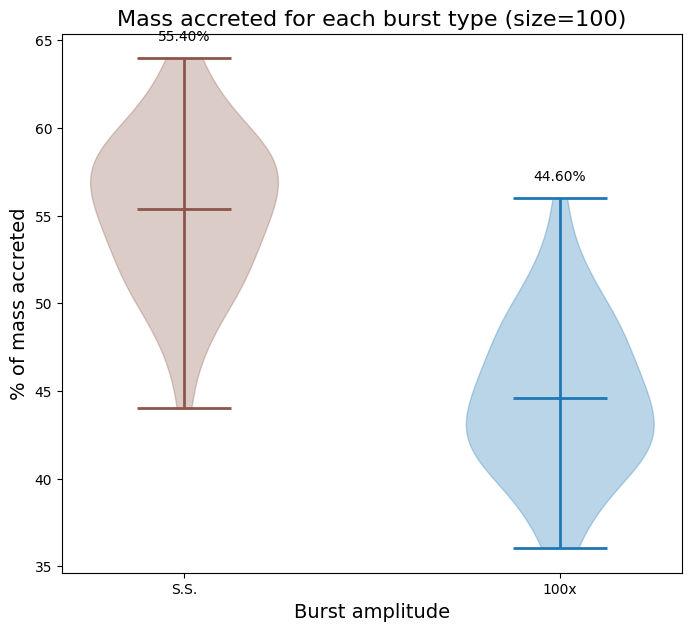

In [21]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac6_100,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_100,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_100))
string6='{:.2f}%'.format(np.mean(frac6_100))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_100)+1,string0,ha='center')
ax1.text(2,np.max(frac6_100)+1,string6,ha='center')
plt.title('Mass accreted for each burst type (size=100)',fontsize=16)
plt.show()    

# 500 stars

## make an array of observational times

In [22]:
burst500=np.load('/home/lee/data/cluster_size_change/6x_burst/burst500_6x.npy')
L500=np.load('/home/lee/data/cluster_size_change/6x_burst/L500_6x.npy')
C500=np.load('/home/lee/data/cluster_size_change/6x_burst/C500_6x.npy')

In [23]:
cluster_size500=500
cad_L500=np.zeros((run,cluster_size500,12))
for i in range(run):
    for j in range(cluster_size500):
        for k in range(len(t_list_cadence)):
            cad_L500[i,j,k]=L500[i,j,t_list_cadence[k]]

In [24]:
print(cad_L500[0,1,:])

[-6.59680798 -4.59680798 -4.59680798 -4.59680798 -4.59680798 -6.59680798
 -6.59680798 -6.59680798 -6.59680798 -6.59680798 -6.59680798 -4.59680798]


## Figure out if a star is undergoing a burst and replace the last 30 years

In [26]:
obs_burst500=np.zeros((run,cluster_size500,12))
for i in range(run):
    for k in range(cluster_size500):
        for j in range(1,12):
            if j==1:
                if cad_L500[i,k,j]-cad_L500[i,k,j-1]==2:
                    obs_burst500[i,k,j-1]=1
                elif cad_L500[i,k,j-1]-cad_L500[i,k,j]==2:
                    if cad_L500[i,k,j]!=cad_L500[i,k,j+1]:
                        obs_burst500[i,k,j]=1
                    elif cad_L500[i,k,j]==cad_L500[i,k,j+1]:
                        obs_burst500[i,k,j:j+2]=1
            else:
                if cad_L500[i,k,j]-cad_L500[i,k,j-1]==2:
                    obs_burst500[i,k,j-6:j]=1 
                    obs_burst500[i,k,0]=0
                elif cad_L500[i,k,j-1]-cad_L500[i,k,j]==2:
                    obs_burst500[i,k,j:j+6]=1
                    print(i,k)

0 0
0 1
0 18
0 36
0 38
0 39
0 42
0 43
0 44
0 49
0 50
0 51
0 52
0 56
0 67
0 69
0 73
0 78
0 93
0 97
0 100
0 101
0 106
0 108
0 111
0 115
0 117
0 139
0 145
0 163
0 171
0 179
0 180
0 183
0 186
0 192
0 199
0 201
0 202
0 203
0 211
0 216
0 219
0 222
0 223
0 230
0 232
0 239
0 241
0 245
0 257
0 259
0 269
0 270
0 273
0 274
0 279
0 281
0 284
0 292
0 296
0 298
0 305
0 310
0 310
0 316
0 320
0 322
0 323
0 327
0 328
0 332
0 333
0 334
0 348
0 355
0 363
0 367
0 375
0 376
0 379
0 386
0 391
0 392
0 393
0 395
0 403
0 409
0 415
0 416
0 417
0 418
0 428
0 429
0 436
0 437
0 440
0 447
0 450
0 457
0 465
0 475
0 482
0 488
0 490
0 496
1 17
1 18
1 19
1 21
1 25
1 28
1 31
1 33
1 38
1 39
1 40
1 41
1 43
1 46
1 49
1 59
1 59
1 64
1 69
1 74
1 79
1 88
1 91
1 96
1 97
1 110
1 111
1 121
1 123
1 140
1 144
1 145
1 146
1 150
1 151
1 156
1 162
1 163
1 164
1 172
1 182
1 183
1 190
1 193
1 197
1 205
1 206
1 207
1 212
1 213
1 224
1 228
1 230
1 231
1 232
1 233
1 235
1 237
1 252
1 254
1 262
1 267
1 272
1 277
1 286
1 287
1 293
1 304
1 3

In [27]:
print(obs_burst500[0,1,:])

[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]


## count number of zeros and ones

In [28]:
num6_500=0
list6_500=[]
num0_500=0
list0_500=[]

for i in range(run):
    for k in range(cluster_size500):
        for j in range(0,12):
            if obs_burst500[i,k,j]==1:
                num6_500+=1
            elif obs_burst500[i,k,j]==0:
                num0_500+=1
    list6_500.append(num6_500)
    num6_500=0
    list0_500.append(num0_500)
    num0_500=0

## convert to mass

In [29]:
mass6_500=[]
mass0_500=[]
for i in range(run):
    mass6_500.append(list6_500[i]*6)
    mass0_500.append(list0_500[i]*1)

## find fraction

In [30]:
frac6_500=[]
frac0_500=[]
for i in range(run):
    total500=mass6_500[i]+mass0_500[i]
    frac6_500.append(100*mass6_500[i]/total500)
    frac0_500.append(100*mass0_500[i]/total500)

## plot it

/tmp/ipykernel_86559/3423054129.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


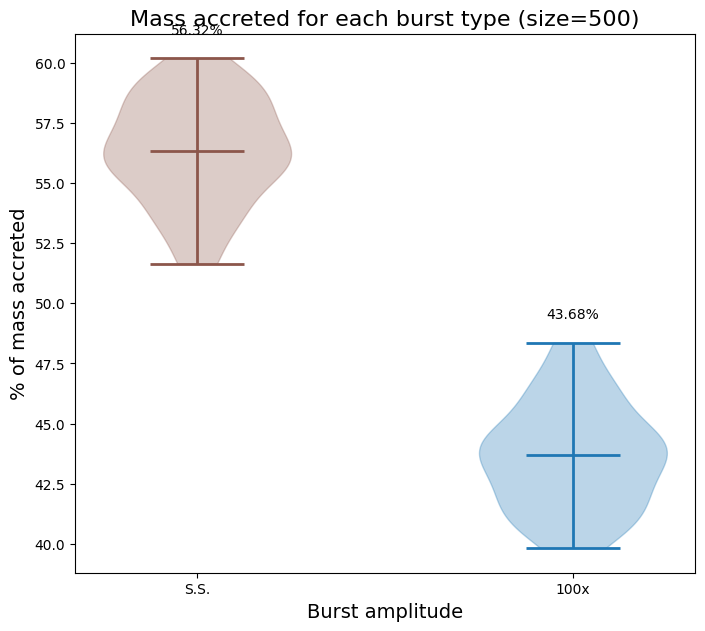

In [31]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac6_500,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_500,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_500))
string6='{:.2f}%'.format(np.mean(frac6_500))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_500)+1,string0,ha='center')
ax1.text(2,np.max(frac6_500)+1,string6,ha='center')
plt.title('Mass accreted for each burst type (size=500)',fontsize=16)
plt.show()  

# 1000 stars

## make an array of observational times

In [32]:
burst1000=np.load('/home/lee/data/cluster_size_change/6x_burst/burst1000_6x.npy')
L1000=np.load('/home/lee/data/cluster_size_change/6x_burst/L1000_6x.npy')
C1000=np.load('/home/lee/data/cluster_size_change/6x_burst/C1000_6x.npy')

In [33]:
cluster_size1000=1000
cad_L1000=np.zeros((run,cluster_size1000,12))
for i in range(run):
    for j in range(cluster_size1000):
        for k in range(len(t_list_cadence)):
            cad_L1000[i,j,k]=L1000[i,j,t_list_cadence[k]]

In [34]:
print(cad_L1000[0,128,:])

[-1.21749222 -1.21749222 -1.21749222 -1.21749222 -1.21749222 -1.21749222
 -1.21749222 -1.21749222 -1.21749222 -1.21749222 -1.21749222 -3.21749222]


## Figure out if a star is undergoing a burst and replace the last 30 years

In [35]:
obs_burst1000=np.zeros((run,cluster_size1000,12))
for i in range(run):
    for k in range(cluster_size1000):
        for j in range(1,12):
            if j==1:
                if cad_L1000[i,k,j]-cad_L1000[i,k,j-1]==2:
                    obs_burst1000[i,k,j-1]=1
                elif cad_L1000[i,k,j-1]-cad_L1000[i,k,j]==2:
                    if cad_L1000[i,k,j]!=cad_L1000[i,k,j+1]:
                        obs_burst1000[i,k,j]=1
                    elif cad_L1000[i,k,j]==cad_L1000[i,k,j+1]:
                        obs_burst1000[i,k,j:j+2]=1
            else:
                if cad_L1000[i,k,j]-cad_L1000[i,k,j-1]==2:
                    obs_burst1000[i,k,j-6:j]=1 
                    obs_burst1000[i,k,0]=0
                elif cad_L1000[i,k,j-1]-cad_L1000[i,k,j]==2:
                    obs_burst1000[i,k,j:j+6]=1
                    print(i,k)

0 1
0 7
0 15
0 19
0 27
0 28
0 34
0 35
0 40
0 54
0 59
0 65
0 66
0 69
0 70
0 75
0 83
0 106
0 109
0 114
0 116
0 119
0 126
0 128
0 129
0 130
0 140
0 143
0 144
0 155
0 159
0 161
0 162
0 172
0 177
0 180
0 195
0 197
0 199
0 203
0 206
0 210
0 211
0 223
0 227
0 235
0 236
0 240
0 247
0 255
0 270
0 272
0 276
0 278
0 291
0 295
0 301
0 302
0 307
0 310
0 311
0 314
0 319
0 320
0 327
0 330
0 340
0 346
0 348
0 351
0 352
0 370
0 372
0 375
0 385
0 392
0 397
0 398
0 407
0 416
0 420
0 425
0 428
0 429
0 432
0 435
0 436
0 437
0 443
0 445
0 445
0 449
0 453
0 454
0 463
0 474
0 475
0 476
0 476
0 477
0 485
0 485
0 488
0 497
0 502
0 503
0 505
0 519
0 522
0 528
0 540
0 543
0 549
0 551
0 552
0 558
0 560
0 562
0 563
0 566
0 569
0 571
0 573
0 574
0 575
0 581
0 592
0 599
0 601
0 606
0 611
0 625
0 634
0 635
0 640
0 643
0 644
0 647
0 651
0 660
0 661
0 664
0 670
0 672
0 681
0 684
0 686
0 690
0 699
0 707
0 712
0 713
0 715
0 718
0 721
0 723
0 728
0 730
0 732
0 733
0 743
0 747
0 762
0 763
0 766
0 767
0 770
0 788
0 791
0 797

## count number of zeros and ones

In [36]:
num6_1000=0
list6_1000=[]
num0_1000=0
list0_1000=[]

for i in range(run):
    for k in range(cluster_size1000):
        for j in range(0,12):
            if obs_burst1000[i,k,j]==1:
                num6_1000+=1
            elif obs_burst1000[i,k,j]==0:
                num0_1000+=1
    list6_1000.append(num6_1000)
    num6_1000=0
    list0_1000.append(num0_1000)
    num0_1000=0

## convert to mass

In [37]:
mass6_1000=[]
mass0_1000=[]
for i in range(run):
    mass6_1000.append(list6_1000[i]*6)
    mass0_1000.append(list0_1000[i]*1)

## find fraction

In [38]:
frac6_1000=[]
frac0_1000=[]
for i in range(run):
    total1000=mass6_1000[i]+mass0_1000[i]
    frac6_1000.append(100*mass6_1000[i]/total1000)
    frac0_1000.append(100*mass0_1000[i]/total1000)

## plot it

/tmp/ipykernel_86559/1595091308.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


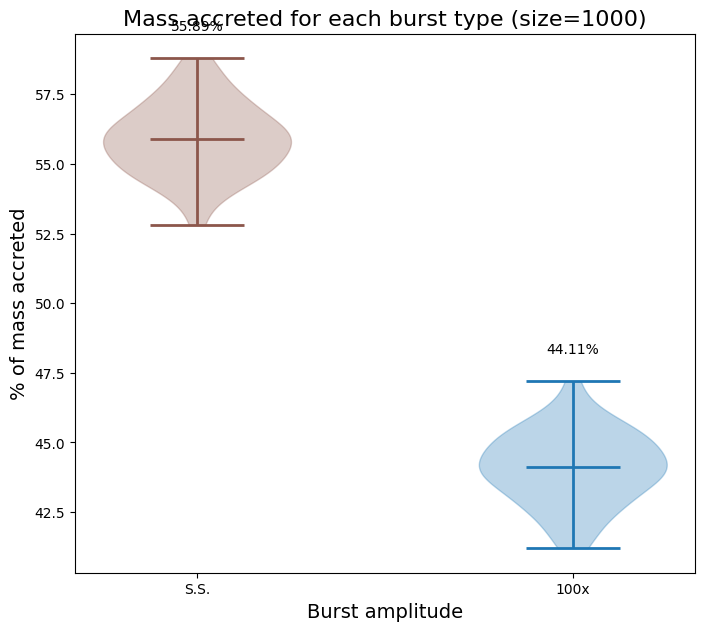

In [39]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac6_1000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_1000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_1000))
string6='{:.2f}%'.format(np.mean(frac6_1000))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_1000)+1,string0,ha='center')
ax1.text(2,np.max(frac6_1000)+1,string6,ha='center')
plt.title('Mass accreted for each burst type (size=1000)',fontsize=16)
plt.show()    

# 2000 stars

## make an array of observational times

In [40]:
burst2000=np.load('/home/lee/data/cluster_size_change/6x_burst/burst2000_6x.npy')
L2000=np.load('/home/lee/data/cluster_size_change/6x_burst/L2000_6x.npy')
C2000=np.load('/home/lee/data/cluster_size_change/6x_burst/C2000_6x.npy')

In [41]:
cluster_size2000=2000
cad_L2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for j in range(cluster_size2000):
        for k in range(len(t_list_cadence)):
            cad_L2000[i,j,k]=L2000[i,j,t_list_cadence[k]]

## figure out if a star is undergoing a burst and replace the last 30 years

In [47]:
obs_burst2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if j==1:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==2:
                    obs_burst2000[i,k,j-1]=1
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==2:
                    if cad_L2000[i,k,j]!=cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j]=1
                    elif cad_L2000[i,k,j]==cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j:j+2]=1
            else:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==2:
                    obs_burst2000[i,k,j-6:j]=1 
                    obs_burst2000[i,k,0]=0
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==2:
                    obs_burst2000[i,k,j:j+6]=1

## count number of zeros and ones

In [48]:
num6_2000=0
list6_2000=[]
num0_2000=0
list0_2000=[]

for i in range(run):
    for k in range(cluster_size2000):
        for j in range(0,12):
            if obs_burst2000[i,k,j]==1:
                num6_2000+=1
            elif obs_burst2000[i,k,j]==0:
                num0_2000+=1
    list6_2000.append(num6_2000)
    num6_2000=0
    list0_2000.append(num0_2000)
    num0_2000=0

## convert to mass

In [49]:
mass6_2000=[]
mass0_2000=[]
for i in range(run):
    mass6_2000.append(list6_2000[i]*6)
    mass0_2000.append(list0_2000[i]*1)

## find fraction

In [50]:
frac6_2000=[]
frac0_2000=[]
for i in range(run):
    total2000=mass6_2000[i]+mass0_2000[i]
    frac6_2000.append(100*mass6_2000[i]/total2000)
    frac0_2000.append(100*mass0_2000[i]/total2000)

## plot it

/tmp/ipykernel_86559/2963951662.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


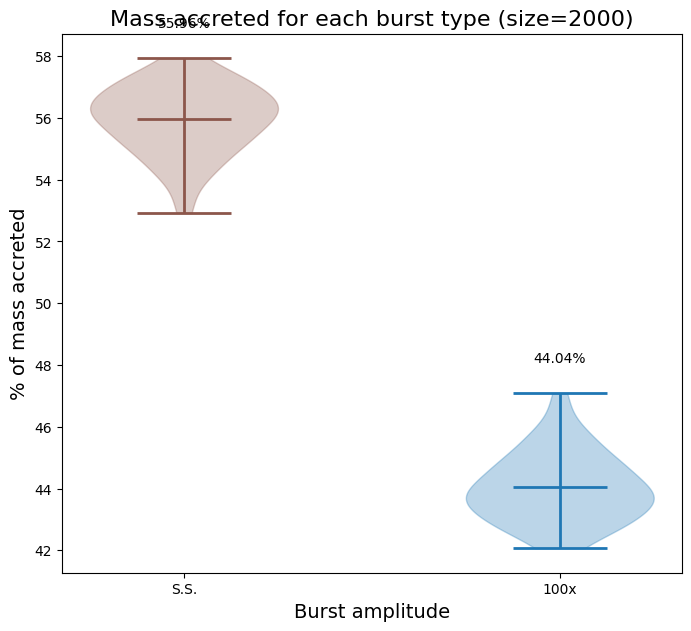

In [51]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac6_2000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_2000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_2000))
string6='{:.2f}%'.format(np.mean(frac6_2000))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_2000)+1,string0,ha='center')
ax1.text(2,np.max(frac6_2000)+1,string6,ha='center')
plt.title('Mass accreted for each burst type (size=2000)',fontsize=16)
plt.show()    

# 5000 stars

## make an array of observational times

In [52]:
burst5000=np.load('/home/lee/data/cluster_size_change/6x_burst/burst5000_6x.npy')
L5000=np.load('/home/lee/data/cluster_size_change/6x_burst/L5000_6x.npy')
C5000=np.load('/home/lee/data/cluster_size_change/6x_burst/C5000_6x.npy')

In [53]:
cluster_size5000=5000
cad_L5000=np.zeros((run,cluster_size5000,12))
for i in range(run):
    for j in range(cluster_size5000):
        for k in range(len(t_list_cadence)):
            cad_L5000[i,j,k]=L5000[i,j,t_list_cadence[k]]

## figure out if a star is undergoing a burst and replace the last 30 years

In [54]:
obs_burst5000=np.zeros((run,cluster_size5000,12))
for i in range(run):
    for k in range(cluster_size5000):
        for j in range(1,12):
            if j==1:
                if cad_L5000[i,k,j]-cad_L5000[i,k,j-1]==2:
                    obs_burst5000[i,k,j-1]=1
                elif cad_L5000[i,k,j-1]-cad_L5000[i,k,j]==2:
                    if cad_L5000[i,k,j]!=cad_L5000[i,k,j+1]:
                        obs_burst5000[i,k,j]=1
                    elif cad_L5000[i,k,j]==cad_L5000[i,k,j+1]:
                        obs_burst5000[i,k,j:j+2]=1
            else:
                if cad_L5000[i,k,j]-cad_L5000[i,k,j-1]==2:
                    obs_burst5000[i,k,j-6:j]=1 
                    obs_burst5000[i,k,0]=0
                elif cad_L5000[i,k,j-1]-cad_L5000[i,k,j]==2:
                    obs_burst5000[i,k,j:j+6]=1
                    print(i,k)

0 13
0 14
0 18
0 19
0 25
0 26
0 32
0 33
0 35
0 46
0 49
0 64
0 65
0 66
0 68
0 70
0 88
0 91
0 98
0 99
0 105
0 110
0 115
0 119
0 120
0 128
0 134
0 135
0 136
0 146
0 149
0 153
0 159
0 170
0 173
0 178
0 184
0 191
0 192
0 198
0 201
0 203
0 204
0 208
0 213
0 221
0 226
0 239
0 241
0 244
0 250
0 257
0 259
0 264
0 267
0 270
0 270
0 271
0 283
0 290
0 293
0 296
0 302
0 306
0 312
0 315
0 323
0 324
0 326
0 336
0 341
0 347
0 351
0 354
0 369
0 372
0 374
0 376
0 386
0 397
0 399
0 404
0 409
0 409
0 410
0 411
0 412
0 413
0 414
0 415
0 424
0 428
0 429
0 431
0 433
0 434
0 437
0 438
0 441
0 453
0 454
0 455
0 456
0 458
0 467
0 468
0 481
0 483
0 484
0 492
0 493
0 496
0 499
0 506
0 511
0 527
0 528
0 529
0 531
0 533
0 534
0 535
0 539
0 541
0 546
0 553
0 564
0 566
0 568
0 570
0 572
0 576
0 593
0 595
0 602
0 605
0 608
0 622
0 626
0 630
0 634
0 635
0 637
0 639
0 649
0 650
0 665
0 666
0 669
0 670
0 678
0 698
0 699
0 700
0 709
0 711
0 713
0 714
0 717
0 720
0 725
0 728
0 730
0 738
0 749
0 751
0 754
0 764
0 768
0 779


## count number of zeros and ones

In [55]:
num6_5000=0
list6_5000=[]
num0_5000=0
list0_5000=[]

for i in range(run):
    for k in range(cluster_size5000):
        for j in range(0,12):
            if obs_burst5000[i,k,j]==1:
                num6_5000+=1
            elif obs_burst5000[i,k,j]==0:
                num0_5000+=1
    list6_5000.append(num6_5000)
    num6_5000=0
    list0_5000.append(num0_5000)
    num0_5000=0

## convert to mass

In [56]:
mass6_5000=[]
mass0_5000=[]
for i in range(run):
    mass6_5000.append(list6_5000[i]*6)
    mass0_5000.append(list0_5000[i]*1)

## find fraction

In [57]:
frac6_5000=[]
frac0_5000=[]
for i in range(run):
    total5000=mass6_5000[i]+mass0_5000[i]
    frac6_5000.append(100*mass6_5000[i]/total5000)
    frac0_5000.append(100*mass0_5000[i]/total5000)

## plot it

/tmp/ipykernel_86559/3918177937.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


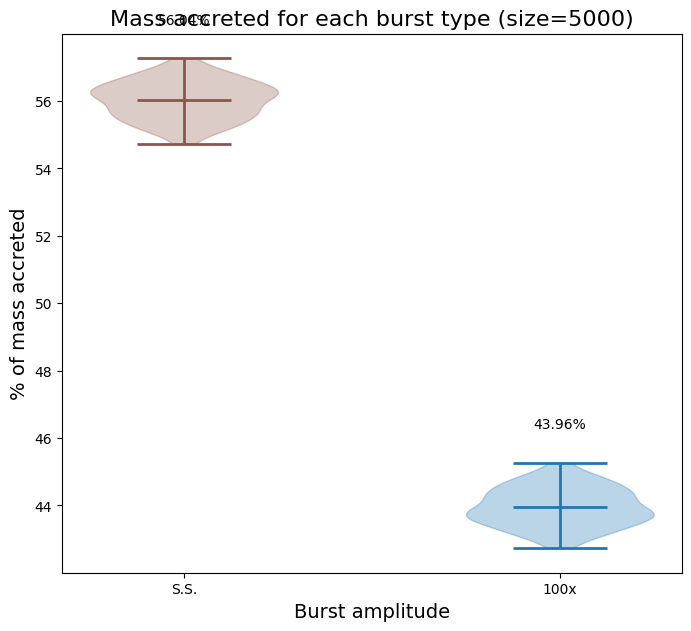

In [58]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac6_5000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac0_5000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(frac0_5000))
string6='{:.2f}%'.format(np.mean(frac6_5000))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(frac0_5000)+1,string0,ha='center')
ax1.text(2,np.max(frac6_5000)+1,string6,ha='center')
plt.title('Mass accreted for each burst type (size=5000)',fontsize=16)
plt.show()    

In [59]:
#means and std
mean50=np.mean(frac6_50)
std50=np.std(frac6_50)
mean100=np.mean(frac6_100)
std100=np.std(frac6_100)
mean500=np.mean(frac6_500)
std500=np.std(frac6_500)
mean1000=np.mean(frac6_1000)
std1000=np.std(frac6_1000)
mean2000=np.mean(frac6_2000)
std2000=np.std(frac6_2000)
mean5000=np.mean(frac6_5000)
std5000=np.std(frac6_5000)

/tmp/ipykernel_86559/3552140505.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','50','100','500','1000','2000','5000'])


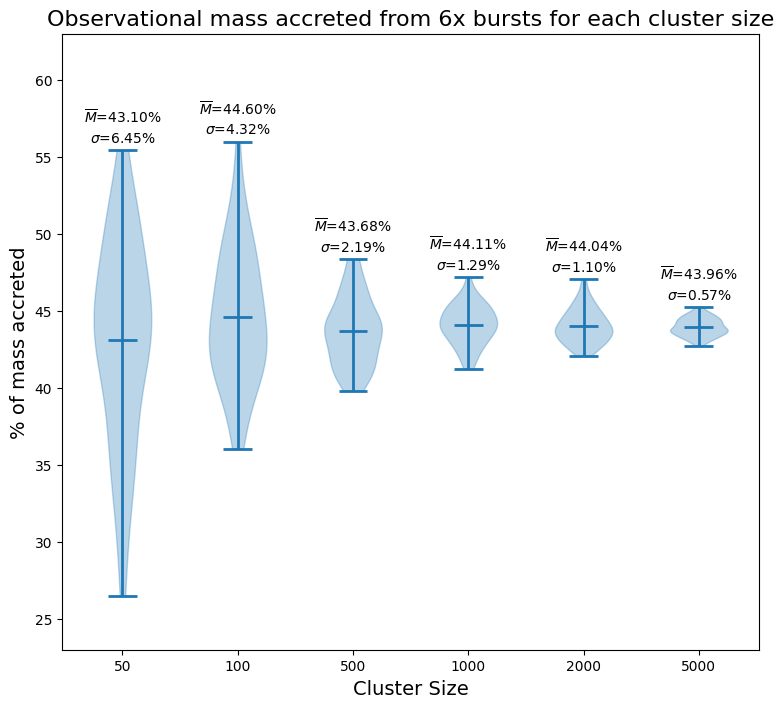

In [61]:
fig,ax1=plt.subplots()
fig.set_size_inches(9,8)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(frac6_50,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(frac6_100,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 

v0=ax1.violinplot(frac6_500,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
v0=ax1.violinplot(frac6_1000,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
v0=ax1.violinplot(frac6_2000,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
v0=ax1.violinplot(frac6_5000,positions=[6],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Cluster Size',fontsize=14)
    
string50mean='{:.2f}%'.format(mean50)
string50std='{:.2f}%'.format(std50)
string100mean='{:.2f}%'.format(mean100)
string100std='{:.2f}%'.format(std100)
string500mean='{:.2f}%'.format(mean500)
string500std='{:.2f}%'.format(std500)
string1000mean='{:.2f}%'.format(mean1000)
string1000std='{:.2f}%'.format(std1000)
string2000mean='{:.2f}%'.format(mean2000)
string2000std='{:.2f}%'.format(std2000)
string5000mean='{:.2f}%'.format(mean5000)
string5000std='{:.2f}%'.format(std5000)

#ax1.locator_params(axis='x',nbins=2)
ax1.set_ylim(23,63)
ax1.text(1,np.max(frac6_50)+1.75,'$\overline{M}$='+string50mean,ha='center')
ax1.text(1,np.max(frac6_50)+0.5,'$\sigma$='+string50std,ha='center')
ax1.text(2,np.max(frac6_100)+1.75,'$\overline{M}$='+string100mean,ha='center')
ax1.text(2,np.max(frac6_100)+0.5,'$\sigma$='+string100std,ha='center')
ax1.text(3,np.max(frac6_500)+1.75,'$\overline{M}$='+string500mean,ha='center')
ax1.text(3,np.max(frac6_500)+0.5,'$\sigma$='+string500std,ha='center')
ax1.text(4,np.max(frac6_1000)+1.75,'$\overline{M}$='+string1000mean,ha='center')
ax1.text(4,np.max(frac6_1000)+0.5,'$\sigma$='+string1000std,ha='center')
ax1.text(5,np.max(frac6_2000)+1.75,'$\overline{M}$='+string2000mean,ha='center')
ax1.text(5,np.max(frac6_2000)+0.5,'$\sigma$='+string2000std,ha='center')
ax1.text(6,np.max(frac6_5000)+1.75,'$\overline{M}$='+string5000mean,ha='center')
ax1.text(6,np.max(frac6_5000)+0.5,'$\sigma$='+string5000std,ha='center')


plt.title('Observational mass accreted from 6x bursts for each cluster size',fontsize=16)
plt.savefig('/home/lee/research/figs/observational/observational_mass_size_change_violinplot6x.jpeg',dpi=300,bbox_inches='tight')
plt.show()  